In [78]:
import pandas as pd
df = pd.read_csv('transaction_data_v2.txt', index_col=0)
df.head()

                member_id        date  amount  payment
transaction_id                                        
1                   10004  2017-03-12      14      552
2                   10004  2017-04-09       7      608
3                   10007  2017-04-27      17       89
4                   10008  2017-04-24       8      602
5                   10011  2017-03-09      11      275

In [3]:
#分用户最初购买时间
df2=df.groupby('member_id').date.min()
df3=df.groupby('member_id').date.max()
df2.head()

member_id
10001    2017-03-13
10002    2017-03-12
10003    2017-03-04
10004    2017-03-06
10005    2017-03-10
Name: date, dtype: object

In [4]:
df3.head()

member_id
10001    2017-04-19
10002    2017-04-24
10003    2017-03-31
10004    2017-04-09
10005    2017-04-16
Name: date, dtype: object

In [9]:
#分用户购买次数
df4=df.groupby('member_id').date.count()
df4.head()

member_id
10001    3
10002    7
10003    3
10004    4
10005    6
Name: date, dtype: int64

In [27]:
d = {'min_date' : df2,
     'max_date' : df3,
        'times':df4,}
dg = pd.DataFrame(d)
dg['std_min_date']=pd.to_datetime(dg.min_date,format='%Y-%m-%d')
dg['std_max_date']=pd.to_datetime(dg.max_date,format='%Y-%m-%d')
dg['average_interval']=(dg.std_max_date-dg.std_min_date)/(dg.times-1)
dg.head()

,max_date,min_date,times,std_min_date,std_max_date,average_interval
member_id,,,,,,
10001,2017-04-19,2017-03-13,3,2017-03-13,2017-04-19,18 days 12:00:00
10002,2017-04-24,2017-03-12,7,2017-03-12,2017-04-24,7 days 04:00:00
10003,2017-03-31,2017-03-04,3,2017-03-04,2017-03-31,13 days 12:00:00
10004,2017-04-09,2017-03-06,4,2017-03-06,2017-04-09,11 days 08:00:00
10005,2017-04-16,2017-03-10,6,2017-03-10,2017-04-16,7 days 09:36:00


In [41]:
#分平均购买间隔的用户数
import numpy as np
dg['average_interval_days']=(dg.average_interval / np.timedelta64(1, 'D')).astype(int)
dg.head()

,max_date,min_date,times,std_min_date,std_max_date,average_interval,average_interval_days
member_id,,,,,,,
10001,2017-04-19,2017-03-13,3,2017-03-13,2017-04-19,18 days 12:00:00,18
10002,2017-04-24,2017-03-12,7,2017-03-12,2017-04-24,7 days 04:00:00,7
10003,2017-03-31,2017-03-04,3,2017-03-04,2017-03-31,13 days 12:00:00,13
10004,2017-04-09,2017-03-06,4,2017-03-06,2017-04-09,11 days 08:00:00,11
10005,2017-04-16,2017-03-10,6,2017-03-10,2017-04-16,7 days 09:36:00,7


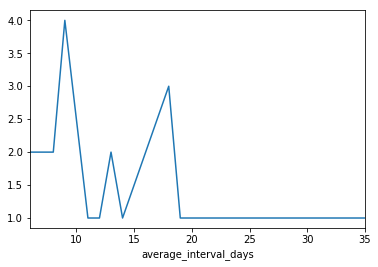

In [52]:
#作图
dg.groupby('average_interval_days').times.count()
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.pyplot import plot
normals = pd.Series(dg.groupby('average_interval_days').times.count())
normals.plot()

In [55]:
dg.groupby('average_interval_days').times.count()

average_interval_days
6     2
7     2
8     2
9     4
11    1
12    1
13    2
14    1
18    3
19    1
35    1
Name: times, dtype: int64

In [72]:
iter_s=[]
for x in dg.average_interval:
    m=(x/ np.timedelta64(1, 'D')).astype(int)
    if m<=5:
        iter_s.append('1~5 days')
    elif m<=15:
        iter_s.append('6~15 days')
    elif m<=30:
        iter_s.append('16~30 days')
    else:
        iter_s.append('30+ days')

dg['interval']=iter_s


In [73]:
dg

             max_date    min_date  times std_min_date std_max_date  \
member_id                                                            
10001      2017-04-19  2017-03-13      3   2017-03-13   2017-04-19   
10002      2017-04-24  2017-03-12      7   2017-03-12   2017-04-24   
10003      2017-03-31  2017-03-04      3   2017-03-04   2017-03-31   
10004      2017-04-09  2017-03-06      4   2017-03-06   2017-04-09   
10005      2017-04-16  2017-03-10      6   2017-03-10   2017-04-16   
10006      2017-04-30  2017-03-03      7   2017-03-03   2017-04-30   
10007      2017-04-27  2017-03-02      4   2017-03-02   2017-04-27   
10008      2017-04-24  2017-03-07      5   2017-03-07   2017-04-24   
10009      2017-04-25  2017-03-01      4   2017-03-01   2017-04-25   
10010      2017-04-07  2017-03-03      2   2017-03-03   2017-04-07   
10011      2017-04-20  2017-03-09      4   2017-03-09   2017-04-20   
10012      2017-04-26  2017-03-05      9   2017-03-05   2017-04-26   
10013      2017-04-2

In [67]:
dg.columns

Index(['max_date', 'min_date', 'times', 'std_min_date', 'std_max_date',
       'average_interval', 'average_interval_days', 'average_interval_days_2'],
      dtype='object')